**K-Means Clustering**

---



**Introduction**
There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

* Customer segmentation
* Understand what the visitors of a website are trying to accomplish
* Pattern recognition
* Machine learning
* Data compression

In this notebook we practice k-means clustering with 2 examples:

* k-means on a random generated dataset
* Using k-means for customer segmentation

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# %matplotlib inline

**k-Means on a randomly generated dataset**

First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [5]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

* n_samples: The total number of points equally divided among clusters.
* Value will be: 5000
* centers: The number of centers to generate, or the fixed center locations.
* Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
* cluster_std: The standard deviation of the clusters.
* Value will be: 0.9

Output
* X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
* y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [6]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

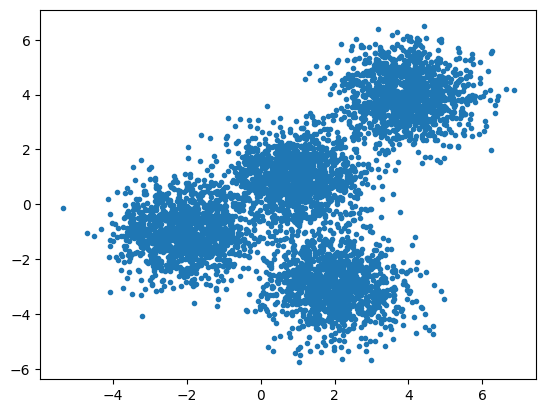

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

**Setting up K-Means**

The KMeans class has many parameters that can be used, but we will be using these three:

* init: Initialization method of the centroids.
* Value will be: "k-means++"
* k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
* n_clusters: The number of clusters to form as well as the number of centroids to generate.
* Value will be: 4 (since we have 4 centers)
* n_init: Number of time the k-means algorithm will be run with different
* centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
* Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means.

In [8]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, X .

In [9]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels

In [10]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .

In [11]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

**Creating the Visual Plot**

---



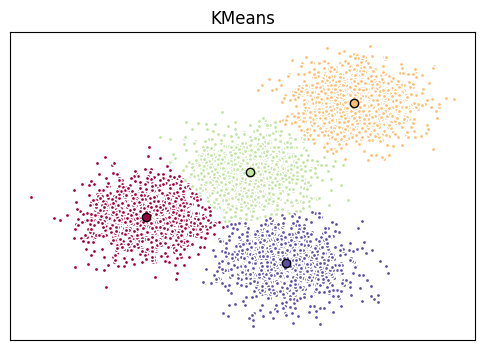

In [12]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()